<a href="https://colab.research.google.com/github/ChandeepaJanithPeiris/Machine-Learning-Mini-Projects/blob/main/Facial_Expression_Recognition_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Facial Expression Recognition Using CNN

This project uses CNNs to recognize and
classify facial expressions from images in CK+ dataset from Kaggle.   
Dataset link : https://www.kaggle.com/datasets/davilsena/ckdataset


In [ ]:
import os
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
from matplotlib import pyplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load dataset
df = pd.read_csv("/content/drive/MyDrive/ckextended.csv")
df.head()

,emotion,pixels,Usage
0,6,36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...,Training
1,6,88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...,Training
2,6,9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...,Training
3,6,104 106 108 104 95 50 60 61 58 83 126 133 139 ...,Training
4,6,68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...,Training


In [ ]:
# there are 7 unique classes
df.emotion.unique()

array([6, 3, 7, 0, 1, 4, 2, 5])

In [ ]:
# label data
label_to_text = {0:'anger', 1:'disgust', 2:'fear', 3:'happiness',4:'sadness', 5:'suprise',6:'neutral',7:'contempt'}


(48, 48)

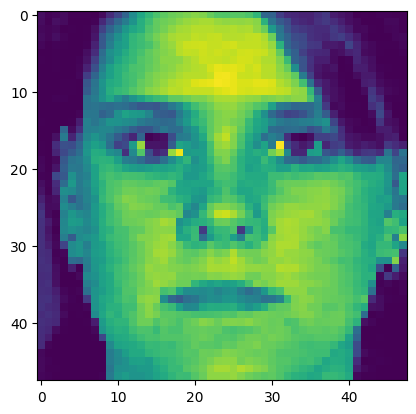

In [ ]:
#show an example image
img = np.array(df.pixels.iloc[2].split(' ')).reshape(48,48).astype('float')
pyplot.imshow(img)
img.shape

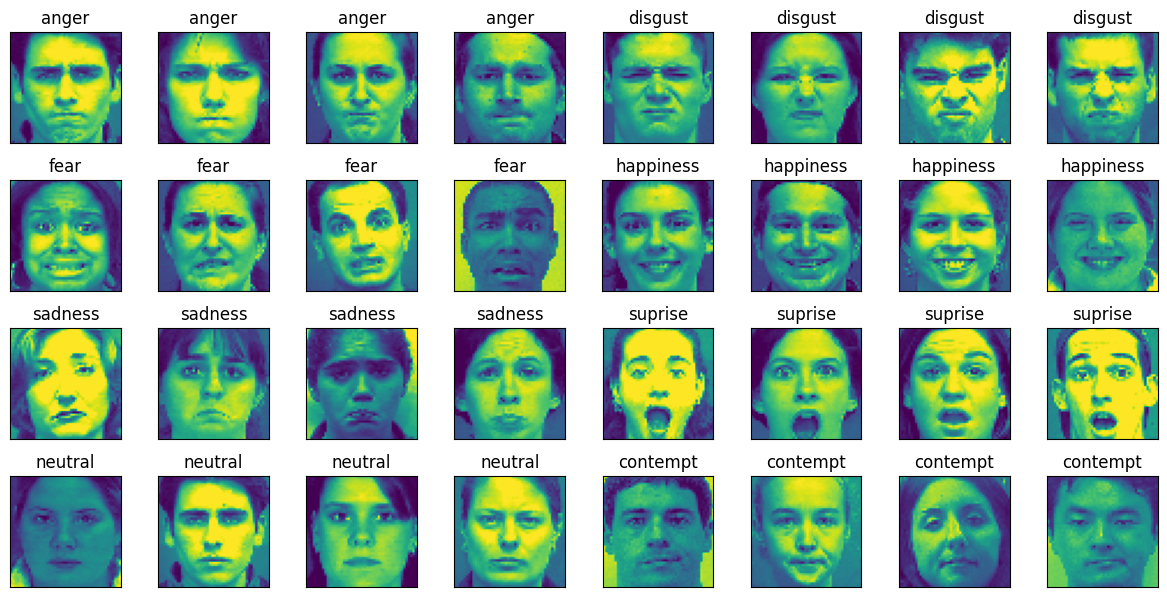

In [ ]:
# show a set of training images with lables
fog = pyplot.figure(1,(12,12))
k=0
for label in sorted(df.emotion.unique()):
    for j in range(4):
        px = df[df.emotion == label].pixels.iloc[j]
        px = np.array(px.split(' ')).reshape(48,48).astype('float32')
        k+=1
        ax = pyplot.subplot(8,8,k)
        ax.imshow(px)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(label_to_text[label])
        pyplot.tight_layout()

In [ ]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48,48,1).astype('float32'))
img_array[0].shape

(48, 48, 1)

In [ ]:
# Try to do this part in a different way
img_array = np.stack(img_array,axis=0)
img_array.shape

(920, 48, 48, 1)

In [ ]:
lables = df.emotion.values
lables.shape

(920,)

In [ ]:
#train ,test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(img_array,lables,test_size=0.2)

In [ ]:
#shape of training data and test data
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(736, 48, 48, 1) (736,) (184, 48, 48, 1) (184,)


In [ ]:
# standardize training and test data
x_train = x_train/255
x_test = x_test/255

In [ ]:
# model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense,Flatten


model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(64,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPool2D(2,2),
    BatchNormalization(),

    Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)),
    MaxPool2D(2,2),
    BatchNormalization(),

    Flatten(),
    Dense(128,activation = 'relu'),
    Dense(8,activation='softmax')

])

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 23, 23, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                        

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer = Adam(0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
23/23 [==============================] - 6s 7ms/step - loss: 1.2363 - accuracy: 0.6617
Epoch 2/50
23/23 [==============================] - 0s 7ms/step - loss: 0.3798 - accuracy: 0.8832
Epoch 3/50
23/23 [==============================] - 0s 8ms/step - loss: 0.1561 - accuracy: 0.9511
Epoch 4/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0863 - accuracy: 0.9715
Epoch 5/50
23/23 [==============================] - 0s 8ms/step - loss: 0.0497 - accuracy: 0.9851
Epoch 6/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0260 - accuracy: 0.9932
Epoch 7/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0080 - accuracy: 1.0000
Epoch 8/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 9/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 10/50
23/23 [==============================] - 0s 5ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 11/50
23/23 [

Actual label is sadness
1/1 [==============================] - 0s 26ms/step
Predicted label is neutral


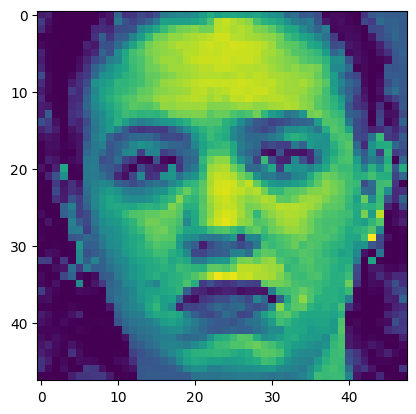

In [ ]:
# evaluation of the model
import time
from IPython.display import clear_output
for k in range(10):
    print(f'Actual label is {label_to_text[y_test[k]]}')
    Predicted_class = model.predict(tf.expand_dims(x_test[k],0)).argmax()
    print(f'Predicted label is {label_to_text[Predicted_class]}')
    pyplot.imshow(x_test[k])
    pyplot.show()
    time.sleep(2)
    clear_output(wait=True)